Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

---Theodore Margoles

# Homework 2: VC Dimension, Decision Trees, Validaiton 



## Part 1: VC Dimension

Answer the below questions by filling your answer in as markdown in the cells provided.

### Question 1 (This is a multipart question. Be sure to respond to each part).
1. For a given finite set of $N$ elements represented by the set A, what is the total number of possible binary labelings?

2. Let C(A) be the set of all distinct labelings of A generated by the hypothesis class C. What is the maximum size, |C(A)| of C(A)? We are asking in general, not for a specific C. Recall the |C(A)| means the number of elements in C(A). 
3. What happens if |C(A)| is smaller than the maximum size above?
4. Give a definition of shattering based on the above.
5. Give a definition of VC dimension using the above definition of shattering. 


The definition of $VC$ dimension is that the $VC$ dimension of a hypothesis class $C$ is $d$ if $|C(A)|\space \ge \space k^{d}$  and  $|C(A)| \space \lt \space k^{d+1}$
1. $2^{N}$
2. $k^{N}$ where $k$ is the number of classes. 
3. Then the hypothesis class cannot attain all possible labelings of $A$, for any $A$.
4. $C$ can shatter $N$ points if $|C(A)|\space \gt \space k^{n}$

1.2: Consider the following: 

Let $A$ be a set of points on the real line, which each can be labeled as either +1 or -1.

Suppose you consider the hypothesis class given by the function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f$ is continuous and piecewise-linear. For each element $x \in A$, we label $x$ as $+1$ if $f(x) > 0$, otherwise we label it $-1$. If we restrict the number of different linear regions of $f$ to $N$, what is the VC dimension of $f$?

"Different linear regions" means what it sounds like, but here is what we mean formally:
The least number of non-intersecting intervals such that the union of the intervals is the whole real line and the slope of $f$ is different on an interval from the intervals immediately adjoining that interval.

For example, $f(x) = |x|$ has two linear regions, and 

$$ f(x) = \begin{cases}
      |x-2|, & \text{if}\ x > 0 \\
      |x+2|, & \text{otherwise}
    \end{cases} $$
    
has four linear regions.

Note: This problem is closely related to similar problems in understanding the complexity of neural networks.

The $VC$ dimension of $f$ is $N+1$. This is because $f$ shatters $N+1$ points but not $N+2$ points

1.3: Consider the following: Your data consists of points situated along the unit circle (they cannot be inside or outside of the circle, only on the boundary/line defined by the circle). What is the VC dimension of the hypothesis class defined by quadralaterals inscribed in the circle? (The corners of the quadrilateral must be on the circle).

The $VC$ dimension of this class is $4$ because we can choose a set of $4$ points that we can correctly label each point for all labelings, but for any set of $5$ points there exists a labeling that it cannot get correctly.

1.4:
For a set of $N$ points $X$, if a hypothesis class $C$ has VC dimension $D$, give two **upper bounds** on how many binary labelings there for the application of $C$ to $X$. Which upper bound is tighter and when?

Well, we know that we can always choose a set of $N$ points such that $C$ can shatter at most $D$ of them. 

**Bound 1**: $2^{N}$,

**Bound 2**: $2^{D}$,

**Bound 1** is tighter when $N \lt D$ and **Bound 2** is tighter otherwise;

that is if we have fewer points than the $VC$-dimension it is a tighter bound to say there are $2^{N}$ possible labelings than $2^{VC(C)}$.  

## Part 2: Decision Tree and Validaiton 

We will use a pre-processed natural language dataset.

**Task**:

Classify emails as "spam" or "not spam" based on word frequency data. 

**Dataset**:

Our dataset is contained in the CSV file "spamdata.csv". Each row contains the word frequency for 54 words plus statistics on the longest "run" of captial letters. 

Word frequency is given by:

$$ f_i = m_i / N $$ 

Where $f_i$ is the frequency for word $i$, $m_i$ is the number of times word $i$ appears in the email, and $N$ is the total number of words in the email.

We wrote a function below that reads in the data, splits it into a train and test set, and also gives you the names for the feature columns.

**Method**:

We will use decision trees to classify the emails.

In [1]:
import numpy as np
from matplotlib import pyplot as plt


### Loading the Data

Below you will implement a function to load the .csv file "spamdata.csv" which has been provided for you. The function must:

1. Shuffle the dataset
2. Split into training and testing splits based off of the parameter test_split
3. Return both training and testing data (features and labels each).

You can use Numpy, Pandas, and Scikit learn functions to accomplish this. 
You may use the Scikit-Learn function `train_test_split`.

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd


def get_spam_dataset(filepath="./spamdata.csv", test_split=0.1):
    '''
    get_spam_dataset
    
    Loads csv file located at "filepath". Shuffles the data and splits
    it so that the you have (1-test_split)*100% training examples and 
    (test_split)*100% testing examples.
    
    Args:
        filepath: location of the csv file
        test_split: percentage/100 of the data should be the testing split
        
    Returns:
        X_train, X_test, y_train, y_test, feature_names
        
        (in that order)
        first four are  np.ndarray
        
    '''
    
    # YOUR CODE HERE
    df = pd.read_csv(filepath, sep=' ')
    df = df.sample(frac=1, replace=False)
    X, y = df.iloc[:, 0:57].values, df.iloc[:, 57].values
    train_len = int(X.shape[0] * (1 - test_split))
    test_len = int(X.shape[0] * (test_split))
    X_train = X[0:train_len]
    y_train = y[0:train_len]
    X_test = X[train_len:train_len + test_len+1]
    y_test = y[train_len:train_len + test_len+1]
    return X_train, X_test, y_train, y_test, df.columns[:-1] 

xtrain, xtest, ytrain, ytest, feature_names = get_spam_dataset()
len(ytest)

461

In [3]:
# Sanity check tests - not comprehensive
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
assert(type(X_train) == np.ndarray)
assert(type(X_test) == np.ndarray)
assert(type(y_train) == np.ndarray)
assert(type(y_test) == np.ndarray)

assert(np.sum(y_test == 1.0) > 0)
assert(np.sum(y_train == 0.0) > 0)

assert(X_train.shape[0] == 4140)
assert(X_train.shape[1] == 57)
assert(y_test.shape[0] == 461)

print("Feature names: {}".format(feature_names))

Feature names: Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_fre

### 2.0: Data Exploration Part 1

In the cell below, perform some initial analysis on the dataset. You must **at least answer the below two questions:**

1. Do we have a balanced set of examples (equal amount of SPAM and NOT SPAM examples) in the training and test datasets? 
2. Try to figure out with a couple plots which words have the biggest impact on an example being SPAM vs. NOT SPAM. Hint: calculate the emperical conditional probability $p(y=SPAM|x>t)$ for each feature $x$ and a reasonable threshold $t$.

In [4]:

# YOUR CODE HERE
spam_to_not_train = np.mean(y_train)
spam_to_not_test = np.mean(y_test)

print("proportion of spam emails in test set: ", spam_to_not_test)
print("proportion of spam emails in train set: ", spam_to_not_train)


def get_p(x, data, labels, t):
    spam = 0
    not_spam = 0
    for (j, d) in enumerate(data):
        if d[x] >= t and labels[j] == 1:
            spam += 1
        elif d[x] >= t and labels[j] == 0:
            not_spam += 1
            
    return spam / (spam + not_spam)
    
for i in range(10):
    print("for feature f=%d" % i)
    print("probability that a given y = SPAM for f > 1")
    print(get_p(i, X_train, y_train, 1))
    

proportion of spam emails in test set:  0.3752711496746204
proportion of spam emails in train set:  0.3961352657004831
for feature f=0
probability that a given y = SPAM for f > 1
0.4666666666666667
for feature f=1
probability that a given y = SPAM for f > 1
0.3533834586466165
for feature f=2
probability that a given y = SPAM for f > 1
0.5362318840579711
for feature f=3
probability that a given y = SPAM for f > 1
1.0
for feature f=4
probability that a given y = SPAM for f > 1
0.691764705882353
for feature f=5
probability that a given y = SPAM for f > 1
0.7066666666666667
for feature f=6
probability that a given y = SPAM for f > 1
0.9802631578947368
for feature f=7
probability that a given y = SPAM for f > 1
0.8188976377952756
for feature f=8
probability that a given y = SPAM for f > 1
0.7628865979381443
for feature f=9
probability that a given y = SPAM for f > 1
0.5585585585585585


### 2.1: Develop the Model

Fill out the below functios that construct your Scikit-Learn model.

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix


def build_dt_class_model(data_X, data_y, max_depth = None):
    '''
    This function builds the decision tree classifier and 
    fits it to the provided data.
    
    Arguments
        data_X - a np.ndarray
        data_y - np.ndarray
        max_depth - None if unrestricted, otherwise an integer for the maximum
                depth the tree can reach.
    
    Returns:
        A trained DecisionTreeClassifier
    '''
    
    # YOUR CODE HERE
    tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tree_clf.fit(data_X, data_y)
    return tree_clf

[]

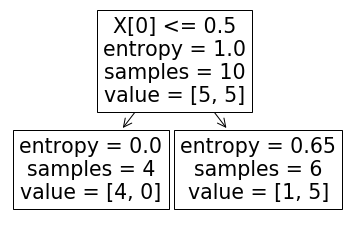

In [6]:
# Sanity check tests
x_ut = np.zeros((10,2))
y_ut = np.zeros((10,))
x_ut[0:6,0] = np.ones_like(x_ut[0:6,0])
x_ut[0,:2] = 1
x_ut[0,8:] = 1
y_ut[0:5] = np.ones_like(y_ut[0:5])
dt_model = build_dt_class_model(x_ut, y_ut, 1)

assert(type(dt_model) == DecisionTreeClassifier)
x_ut_test = np.array([[0.0, 0.0], [1.0, 1.0]])
y_hat_ut = dt_model.predict(x_ut_test)
assert(y_hat_ut[0] == 0)
assert(y_hat_ut[1] == 1)
assert(dt_model.get_depth() == 1)

plot_tree(dt_model)
plt.plot()

### Precision and Recall Functions 

Fill in the below functions that calculate precision and recall based on vectors of labels and vectors of predictions. 

This is a binary classificaiton problem, therefore we can label all points as either positive (SPAM) or negative (NOT SPAM). 

"True postives" (TP) are emails we predict to be SPAM, and those emails also have true label SPAM.
"False positives" (FP) are emails we predict to be SPAM but have true label NOT SPAM. 

The same reasoning applies to "true negative" (TN) and "false negative" (FN). 

Precision is: (TP)/(TP + FP). Note the denominator is the number of positive predictions. 

Thus precision is roughly a measure of how "useful" your positive predicitons are. 

Recall is: (TP)/(TP+FN). Note the denominator is thenumber of positive labels. 

Thus recall is roughly a measure of how "complete" your positive predictions are. 

In [7]:
def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # YOUR CODE HERE
    tp, fp, tn, fn, = 0.0, 0.0, 0.0, 0.0
    for (yi, yh) in zip(y_true, y_pred):
        if yi == yh: #predicted correctly
            if yh == pos_label_value: #was spam
                tp += 1
            else:
                tn += 1
        else: #predicted incorrectly
            if yh == pos_label_value: #incorrectly said it was a spam
                fp += 1
            else: #incorrectly said it was not a spam
                fn += 1
    
    return tp / (tp + fp)

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # YOUR CODE HERE
    tp, fp, tn, fn, = 0.0, 0.0, 0.0, 0.0
    for (yi, yh) in zip(y_true, y_pred):
        if yi == yh: #predicted correctly
            if yh == pos_label_value: #was spam
                tp += 1
            else:
                tn += 1
        else: #predicted incorrectly
            if yh == pos_label_value: #incorrectly said it was a spam
                fp += 1
            else: #incorrectly said it was not a spam
                fn += 1
    
    return tp / (tp + fn)

In [8]:
# Sanity check tests
ut_true = np.array([1.0, 1.0, 0.0, 0.0])
ut_pred = np.array([1.0, 1.0, 1.0, 1.0])
prec = calculate_precision(ut_true, ut_pred, 1.0)
recall = calculate_recall(ut_true, ut_pred, 1.0)
print(prec)
print(recall)
assert(prec == 0.5)
assert(recall == 1.0)

0.5
1.0


### 2.2: Analyze and Interpret the Model

In this section we will analyze the performance of our model on the Spam dataset. We will attempt to understand how the model makes decisions and why a particular split was chosen in the beginning levels of the tree (close to the root).

Unlike the last homework, less is written out before hand for you. You must write all the code to perform the analysis.

1. To avoid touching the test set, split the X_train and y_train arrays into X_train, y_train, and X_valid, y_valid datasets. Use ~10% of the training datset for the validation.

2. Create a model with a shallow max_depth of 2. Build the model on the training set.

3. Report precision/recall on the training and validation sets.

4. Report depth of the tree.

5. Plot the tree using the `plot_tree` function. 

You may want to use `plt.figure(figsize=(10,10))` to make the tree plot bigger.

Training: Precision = 0.932084, recall = 0.540027
Validation: Precision = 0.891089, recall = 0.548780
Tree Height = 2


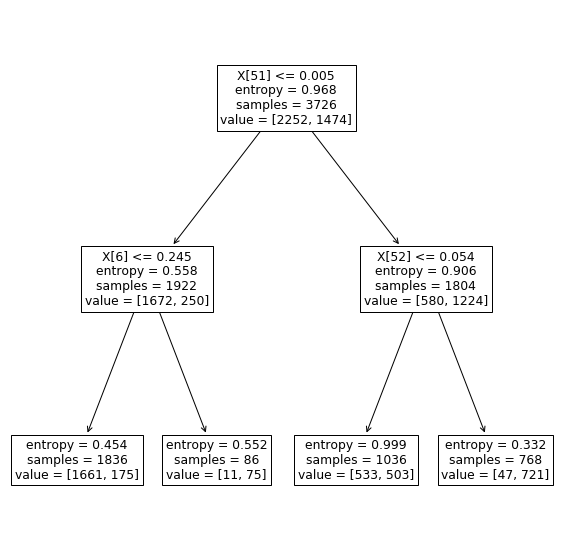

In [9]:
plt.figure(figsize=(10, 10))

# First line here resets the X_train, y_train values. 
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

valid_len = int(0.1 * len(X_train))

X_valid = X_train[0:valid_len+1]
y_valid = y_train[0:valid_len+1]

X_train = X_train[valid_len:]
y_train = y_train[valid_len:]

clf = build_dt_class_model(X_train, y_train, 2)
y_hatt = clf.predict(X_train)
y_hatv = clf.predict(X_valid)

p_valid = calculate_precision(y_valid, y_hatv)
p_train = calculate_precision(y_train, y_hatt)

r_valid = calculate_recall(y_valid, y_hatv)
r_train = calculate_recall(y_train, y_hatt)

print("Training: Precision = %f, recall = %f" % (p_train, r_train))
print("Validation: Precision = %f, recall = %f" % (p_valid, r_valid))
print("Tree Height = %d" % clf.get_depth())
a = plot_tree(clf)

Now you must interpret the model. We provide one cell for you to write your answers in markdown and one cell for you to write any extra code.
    
1. Describe which features the tree uses to make the decisions, and how they influence the SPAM/NOT SPAM decision. You should be refering to 3 different features for depth of 2. Use the text names of the features, not their indices.


In [10]:
# YOUR CODE HERE
f = clf.tree_.feature
print(f)

[51  6 -2 -2 52 -2 -2]


The tree first splits on feature $X[52]$ being the $52$nd index into our feature vector for each spam email,
for $X[52]$ $\le$ $0.056$ we have a node of mainly spam emails with entropy = $0.783.$ Then we split this node on if $X[6]$ $\le$ $0.055$. On the other size of the first split, with entropy of about $0.5$ of mainly not spam we then split on $X[24]$ $\le$ $0.19$. The bottom four leaves have entropies: $[0.64, 0.44, 0.31, 0.72]$

### 2.2: Perform  Validation to Select the Depth Parameter 

In this section we will perform validation to selectthe depth parameter. Unlike in class, this time we will ask you to perform validation using a random subsample of 25% of the training data. Your task is the following:

1. It is recommended in the beginning of your code to call `X_train, X_test, y_train, y_test = get_spam_dataset()` to reset the data variables. Only call this once in the cell.
2. Split off a valiation dataset with ~25% of your training dataset. Do this only once in your cell. All models you build will be evaluated on this same validation dataset. 
2. Write code that builds a models for max_depths of within a range of values (a good set might be 20 numbers in the interval 1-40). You should get the precision and recall performance on the validation set and store them in arrays.

Once you have the above, you should generate two plots:

1. The first plot should plot two lines - the precision and recall performance. The x-axis should be your `max_depth` values and the y_axis should be between 0 and 1. Include a legend (`plt.legend`) and label the precision and recall lines.

2. Create a scatter plot (not a line plot) that scatters your precision and recall values so that precision is the y axis and recall is your x axis.


28


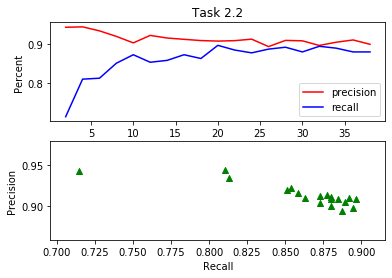

In [11]:
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()

# YOUR CODE HERE
valid_len = int(0.25 * len(y_train))
X_valid = X_train[0:valid_len+1]
y_valid = y_train[0:valid_len+1]

X_train = X_train[valid_len:]
y_train = y_train[valid_len:]

depths = np.arange(2, 40, 2)

ps, rs, ts = [], [], []
for dp in depths:
    clf = build_dt_class_model(X_train, y_train, dp)
    yp = clf.predict(X_valid)
    ps.append(calculate_precision(y_valid, yp))
    rs.append(calculate_recall(y_valid, yp))
    ts.append(clf.get_depth())

print(np.max(ts))
fig, ax = plt.subplots(2)
ax[0].set_title("Task 2.2")
ax[0].set_xlabel("max depth")
ax[0].set_ylabel("Percent")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
l1, = ax[0].plot(depths, ps, color='r', label='precision')
l2, = ax[0].plot(depths, rs, color='b', label='recall')
ax[0].legend(handles=[l1, l2])
ax[1].scatter(rs, ps, color='g', marker='^')

### Analysis

Answer the below question regarding the output you generated above (short answer, 2-3 sentances each please):

0. Just because we let max_depth increase doesn't mean the depth actually goes to that depth. Report the maximal true depth the model reaches for the largest max_depth parameter you test.
1. Does the classifier max_depth which has the best RECALL performance also have the best PRECISION performance? 
2. Why would you choose a classifier based on RECALL rather than PRECISION or vice versa? How would you make your selection for this dataset? 
3. What general trends do you observe in recall and precision performance as the max depth parameter increases? Because your validation split is random, you can try re-running multiple times to see what happens.

0. The max depth actually reaches is 26. 
1. No, not from my results. 
2. You could choose a classifier based on precision if you want to reduce the chance of overfitting, and you could choose based on recall if you are worried about underfitting to the training data. 
3. Precision spikes but then plateus early, but recall slowly and steadily tends to increase. 

### Final Test Assessment 

For your final task, select a value for `max_depth` based on your analysis above. We provide a code cell and a markdown cell. In the code cell:

1. Re-fit the classifier using all the training data using your value for `max_depth`.
2. Predict and report precision/recall on the test set. 

In the markdown cell:

1. Explain why you chose the `max_depth` parameter. (There's not necessarily one right answer to this). But if you are classifying emails, you probably don't want to OVER classify as spam and filter out important emails, unless you are deathly allergic to SPAM. 

In [12]:
X_train, X_test, y_train, y_test, feature_names = get_spam_dataset()
maxDepth = 5

clf = build_dt_class_model(X_train, y_train, maxDepth)

y_pred = clf.predict(X_test)

p = calculate_precision(y_test, y_pred)
r = calculate_recall(y_test, y_pred)

print("precision: %f, recall %f" %(p, r))

precision: 0.919255, recall 0.840909


I chose a max depth of 5 based on multiple runs of my plot above to try to find the sweetspot between precision and recall without going to a really high depth! A high precision is important so we are not filtering out a bunch of good non-SPAM messages! 